In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
df.drop(['Unnamed: 0','Clothing ID'],axis=1,inplace=True)
df.dropna(inplace=True)

In [7]:
df['Title_Review'] = df['Title'] + ' ' + df['Review Text']
df.drop(['Title','Review Text'],axis=1,inplace=True)

In [8]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_Review
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...
5,49,2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...
6,39,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

In [10]:
X = df[['Age','Rating','Positive Feedback Count','Division Name','Department Name','Class Name','Title_Review']]  # Features
y = df['Recommended IND']  # Target

In [11]:
X.head()

,Age,Rating,Positive Feedback Count,Division Name,Department Name,Class Name,Title_Review
2,60,3,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...
5,49,2,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...
6,39,5,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...


### Remove special characters in the Title_Review column

In [12]:
import re

def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'  
    text = re.sub(pattern, '', text)
    return text

 
X['Title_Review'] = X['Title_Review'].apply(remove_special_characters)
 


In [13]:
y.head()

2    0
3    1
4    1
5    0
6    1
Name: Recommended IND, dtype: int64

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preprocessing

In [15]:
categorical_features = ['Division Name', 'Department Name','Class Name']
numerical_features = ['Age','Rating','Positive Feedback Count']
text_feature = 'Title_Review'

In [16]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# For text feature,i use TF-IDF vectorizer
text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer())
])

In [17]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
        ('text', text_transformer, text_feature)
    ])

## Logistic Regression

In [18]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

In [19]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Division Name',
                                                   'Department Name',
                                                   'Class Name']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Rating',
                                                   'Positive Feedback Count']),
                                                 ('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'Title_Review')])),
                ('classifier', LogisticRegression())])

In [20]:
# Predict on the test set
y_pred = model.predict(X_test)

In [21]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       700
           1       0.97      0.97      0.97      3233

    accuracy                           0.95      3933
   macro avg       0.92      0.93      0.92      3933
weighted avg       0.95      0.95      0.95      3933



In [23]:
# Additional evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9532163742690059


### Fine tuning

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0] 
}

# Perform Grid Search 
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)  

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

 
best_model = grid_search.best_estimator_

Best parameters: {'classifier__C': 1.0}


### Doing this process for  4 different classification algorithms

In [25]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define parameter grids for each classifier
param_grids = {
    'Logistic Regression': {'classifier__C': [0.1, 1.0, 10.0]},
    'Random Forest': {'classifier__n_estimators': [100, 200, 300], 'classifier__max_depth': [None, 10, 20]},
    'SVM': {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']},
    'Gradient Boosting': {'classifier__n_estimators': [100, 200, 300], 'classifier__learning_rate': [0.01, 0.1, 1.0]}
}

# Perform Grid Search  for each classifier
best_models = {}
for clf_name, clf in classifiers.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])
    grid_search = GridSearchCV(pipeline, param_grids[clf_name], cv=5)
    grid_search.fit(X_train, y_train)  
    best_models[clf_name] = grid_search.best_estimator_
    
    # Print the best parameters found
    print(f"Best parameters for {clf_name}:", grid_search.best_params_)


Best parameters for Logistic Regression: {'classifier__C': 1.0}
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best parameters for SVM: {'classifier__C': 1.0, 'classifier__kernel': 'linear'}
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 300}


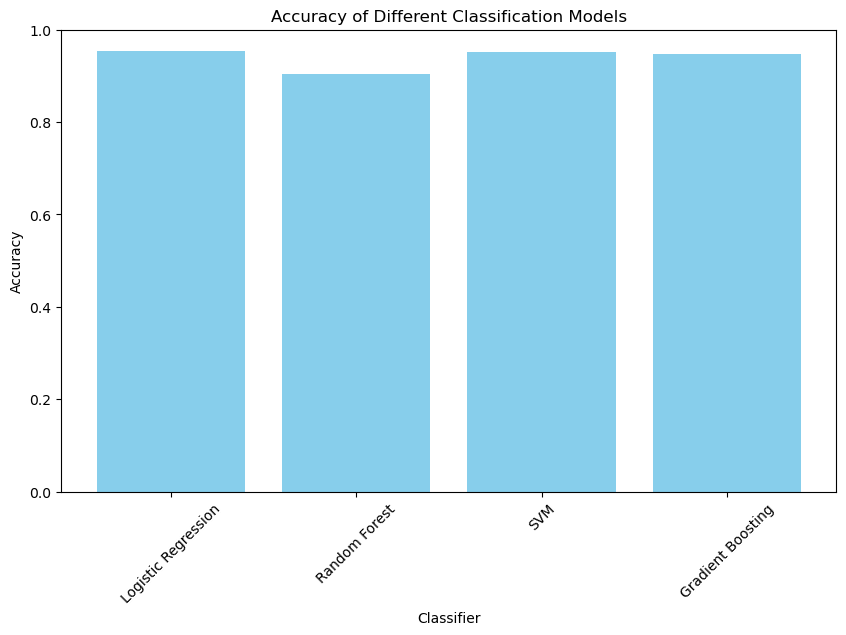

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
 
model_names = []
accuracies = []

# Iterate through each best model
for clf_name, clf in best_models.items():
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    # Append model name and accuracy to lists
    model_names.append(clf_name)
    accuracies.append(acc)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0, 1)  
plt.xticks(rotation=45)   
plt.show()
